In [2]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [3]:
train_dataset = datasets.MNIST(
    root="data", ## where to
    train=True, ## do we want the training datset
    download=True, ## do we want to download it
    transform=ToTensor(), ## transform them to tensors
    target_transform=None ## transform the labels
)

test_dataset = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 11620942.45it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 350214.50it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3193048.78it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 8236285.68it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
len(train_dataset), len(test_dataset)

(60000, 10000)

In [5]:
image, label = train_dataset[0]
image.shape, label

(torch.Size([1, 28, 28]), 5)

In [6]:
class_names = train_dataset.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [7]:
class_to_idx = train_dataset.class_to_idx
class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

(-0.5, 27.5, 27.5, -0.5)

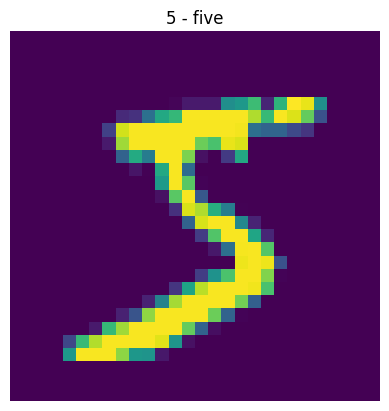

In [8]:
plt.imshow(image.squeeze())
plt.title(class_names[label])
plt.axis("off")

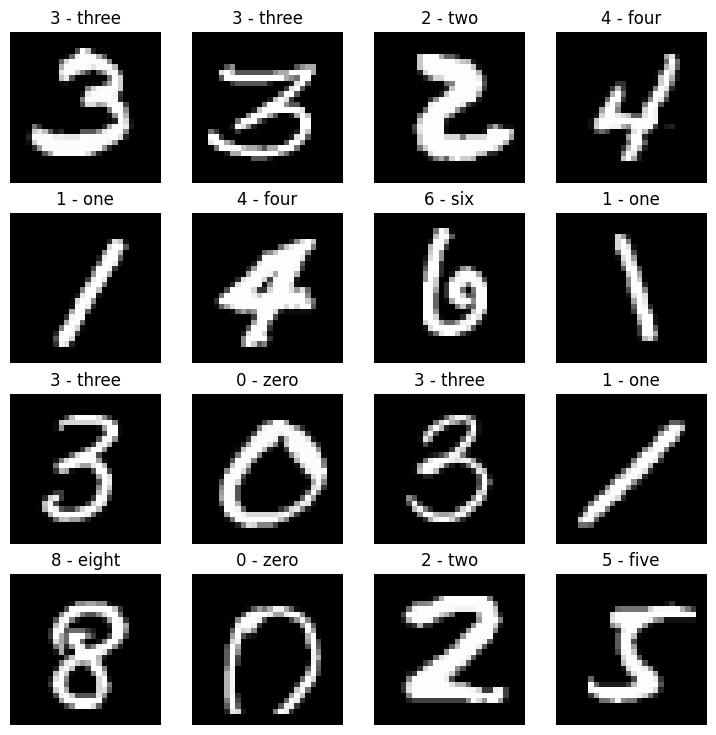

In [9]:
## plot random images
#torch.manual_seed(23)

fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1,rows*cols+1):
    random_idx = torch.randint(0,len(train_dataset),size=[1]).item()
    image, label = train_dataset[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(image.squeeze(),cmap="gray")
    plt.title(class_names[label])
    plt.axis("off")

In [10]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=32,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_dataset,
    batch_size=32,
    shuffle=False
)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x79c5dbddd450>,
 <torch.utils.data.dataloader.DataLoader at 0x79c5d9877ca0>)

In [12]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [13]:
flatten_model = nn.Flatten()

x = train_features_batch[0]
x.shape  ## torch.Size([1, 28, 28]) -> color channels, height, width

output = flatten_model(x) ## perform forward pass
output.shape  ## -> color channels, height*width

torch.Size([1, 784])

In [14]:
# Load and preprocess the dataset (MNIST)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

In [15]:
## cnn model
class Lenet5(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels= input_shape,
                  out_channels=hidden_units,
                  kernel_size = (5,5),
                  stride = 2,
                  padding = 1),
        nn.Tanh(),
        nn.Conv2d(in_channels= hidden_units,
                   out_channels= hidden_units,
                   kernel_size = 3,
                   stride = 1,
                   padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels= hidden_units,
                  out_channels=hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_units,
                   out_channels= hidden_units,
                   kernel_size = 3,
                   stride = 1,
                   padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

def forward(self, x):
  x = self.conv_block_1(x)
  print(x.shape)
  x = self.conv_block_2(x)
  print(x.shape)
  x = self.classifier(x)
  print(x.shape)
  return x

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Define the LeNet-5 model with tanh activations
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # Fully connected layer 1
        self.fc2 = nn.Linear(120, 84)          # Fully connected layer 2
        self.fc3 = nn.Linear(84, 10)           # Output layer

    def forward(self, x):
        x = torch.tanh(self.conv1(x))          # Apply Tanh after Conv1
        x = torch.max_pool2d(x, kernel_size=2) # Apply Max Pooling with a kernel size of 2

        x = torch.tanh(self.conv2(x))          # Apply Tanh after Conv2
        x = torch.max_pool2d(x, kernel_size=2) # Apply Max Pooling with a kernel size of 2

        x = x.view(-1, 16 * 5 * 5)             # Flatten the output from the conv layers
        x = torch.tanh(self.fc1(x))            # Fully connected layer 1 with Tanh
        x = torch.tanh(self.fc2(x))            # Fully connected layer 2 with Tanh
        x = self.fc3(x)                        # Output layer (no activation function)
        return x

# Load and preprocess the dataset (MNIST)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Initialize the model, loss function, and optimizer
model = LeNet5()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Training the model
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader):
        optimizer.zero_grad()                 # Zero the parameter gradients

        outputs = model(inputs)               # Forward pass
        loss = criterion(outputs, labels)     # Compute the loss
        loss.backward()                       # Backward pass
        optimizer.step()                      # Optimize the weights

        running_loss += loss.item()
        if i % 100 == 99:    # Print every 100 mini-batches
            print(f"[{epoch + 1}, {i + 1}] loss: {running_loss / 100:.3f}")
            running_loss = 0.0

print("Training finished.")

# Evaluate the model
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy of the network on the 10,000 test images: {100 * correct / total:.2f}%")

[1, 100] loss: 1.794
[1, 200] loss: 0.497
[1, 300] loss: 0.291
[1, 400] loss: 0.216
[1, 500] loss: 0.172
[1, 600] loss: 0.144
[1, 700] loss: 0.128
[1, 800] loss: 0.113
[1, 900] loss: 0.100
[2, 100] loss: 0.080
[2, 200] loss: 0.082
[2, 300] loss: 0.085
[2, 400] loss: 0.081
[2, 500] loss: 0.088
[2, 600] loss: 0.070
[2, 700] loss: 0.066
[2, 800] loss: 0.059
[2, 900] loss: 0.065
[3, 100] loss: 0.046
[3, 200] loss: 0.051
[3, 300] loss: 0.062
[3, 400] loss: 0.056
[3, 500] loss: 0.048
[3, 600] loss: 0.061
[3, 700] loss: 0.052
[3, 800] loss: 0.051
[3, 900] loss: 0.052
[4, 100] loss: 0.053
[4, 200] loss: 0.037
[4, 300] loss: 0.040
[4, 400] loss: 0.040
[4, 500] loss: 0.040
[4, 600] loss: 0.039
[4, 700] loss: 0.046
[4, 800] loss: 0.040
[4, 900] loss: 0.036
[5, 100] loss: 0.035
[5, 200] loss: 0.037
[5, 300] loss: 0.039
[5, 400] loss: 0.029
[5, 500] loss: 0.035
[5, 600] loss: 0.030
[5, 700] loss: 0.037
[5, 800] loss: 0.035
[5, 900] loss: 0.027
[6, 100] loss: 0.031
[6, 200] loss: 0.025
[6, 300] loss

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Define the LeNet-5 model with nn.Sequential
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.layers = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Flatten(),  # Flatten the tensor for fully connected layers

            nn.Linear(16 * 5 * 5, 120),
            nn.Tanh(),

            nn.Linear(120, 84),
            nn.Tanh(),

            nn.Linear(84, 10)
        )

    def forward(self, x):
        return self.layers(x)


# Initialize the model, loss function, and optimizer
model = LeNet5()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Training the model
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader):
        optimizer.zero_grad()                 # Zero the parameter gradients

        outputs = model(inputs)               # Forward pass
        loss = criterion(outputs, labels)     # Compute the loss
        loss.backward()                       # Backward pass
        optimizer.step()                      # Optimize the weights

        running_loss += loss.item()
        if i % 100 == 99:    # Print every 100 mini-batches
            print(f"[{epoch + 1}, {i + 1}] loss: {running_loss / 100:.3f}")
            running_loss = 0.0

print("Training finished.")

# Evaluate the model
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy of the network on the 10,000 test images: {100 * correct / total:.2f}%")

[1, 100] loss: 1.627
[1, 200] loss: 0.450
[1, 300] loss: 0.273
[1, 400] loss: 0.205
[1, 500] loss: 0.154
[1, 600] loss: 0.139
[1, 700] loss: 0.114
[1, 800] loss: 0.103
[1, 900] loss: 0.097
[2, 100] loss: 0.091
[2, 200] loss: 0.081
[2, 300] loss: 0.084
[2, 400] loss: 0.076
[2, 500] loss: 0.075
[2, 600] loss: 0.063
[2, 700] loss: 0.063
[2, 800] loss: 0.057
[2, 900] loss: 0.059
[3, 100] loss: 0.052
[3, 200] loss: 0.051
[3, 300] loss: 0.050
[3, 400] loss: 0.054
[3, 500] loss: 0.051
[3, 600] loss: 0.048
[3, 700] loss: 0.060
[3, 800] loss: 0.045
[3, 900] loss: 0.052
[4, 100] loss: 0.043
[4, 200] loss: 0.039
[4, 300] loss: 0.033
[4, 400] loss: 0.038
[4, 500] loss: 0.042
[4, 600] loss: 0.040
[4, 700] loss: 0.037
[4, 800] loss: 0.048
[4, 900] loss: 0.039
[5, 100] loss: 0.031
[5, 200] loss: 0.038
[5, 300] loss: 0.033
[5, 400] loss: 0.032
[5, 500] loss: 0.040
[5, 600] loss: 0.031
[5, 700] loss: 0.033
[5, 800] loss: 0.025
[5, 900] loss: 0.039
[6, 100] loss: 0.021
[6, 200] loss: 0.025
[6, 300] loss